In [1]:
import PIL.Image as Image
import torch
import numpy as np
from torchvision.transforms.functional import center_crop
import os

import scipy.io as scio

img_names = os.listdir('./Images')
img_names.sort()
labels_n = os.listdir('./Labels')
labels_n.sort()

imgs = torch.zeros(0,3,256,256).float()
labels = np.zeros((0,256,256,2),dtype=np.int32)

for i in img_names:
    img = Image.open('./Images/'+i)
    img = torch.from_numpy(np.array(img)).float() / 255
    img = img.permute(2, 0, 1)
    img = center_crop(img, [256,256])
    img = img.unsqueeze(0)
    imgs = torch.cat((imgs,img),0)

for i in labels_n:
    label = scio.loadmat('./Labels/'+i)['inst_map']
    label = center_crop(torch.from_numpy(label), [256,256]).numpy()
    mask = label !=0
    mask = mask.astype(np.int32)
    _mask = np.stack((label,mask),axis=-1)
    _mask = np.expand_dims(_mask,0)
    print(_mask.shape)
    print(labels.shape)
    labels = np.concatenate((labels,_mask),0)

np.save('./labels.npy',labels)
torch.save(imgs,'./imgs.pt')


(1, 256, 256, 2)
(0, 256, 256, 2)
(1, 256, 256, 2)
(1, 256, 256, 2)
(1, 256, 256, 2)
(2, 256, 256, 2)
(1, 256, 256, 2)
(3, 256, 256, 2)
(1, 256, 256, 2)
(4, 256, 256, 2)
(1, 256, 256, 2)
(5, 256, 256, 2)
(1, 256, 256, 2)
(6, 256, 256, 2)
(1, 256, 256, 2)
(7, 256, 256, 2)
(1, 256, 256, 2)
(8, 256, 256, 2)
(1, 256, 256, 2)
(9, 256, 256, 2)
(1, 256, 256, 2)
(10, 256, 256, 2)
(1, 256, 256, 2)
(11, 256, 256, 2)
(1, 256, 256, 2)
(12, 256, 256, 2)
(1, 256, 256, 2)
(13, 256, 256, 2)
(1, 256, 256, 2)
(14, 256, 256, 2)
(1, 256, 256, 2)
(15, 256, 256, 2)
(1, 256, 256, 2)
(16, 256, 256, 2)
(1, 256, 256, 2)
(17, 256, 256, 2)
(1, 256, 256, 2)
(18, 256, 256, 2)
(1, 256, 256, 2)
(19, 256, 256, 2)
(1, 256, 256, 2)
(20, 256, 256, 2)
(1, 256, 256, 2)
(21, 256, 256, 2)
(1, 256, 256, 2)
(22, 256, 256, 2)
(1, 256, 256, 2)
(23, 256, 256, 2)
(1, 256, 256, 2)
(24, 256, 256, 2)
(1, 256, 256, 2)
(25, 256, 256, 2)
(1, 256, 256, 2)
(26, 256, 256, 2)
(1, 256, 256, 2)
(27, 256, 256, 2)
(1, 256, 256, 2)
(28, 256, 256

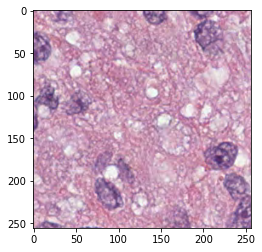

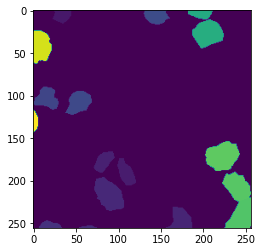

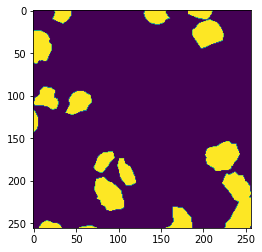

In [18]:
import matplotlib.pyplot as plt

plt.imshow(imgs[0].permute(1,2,0))
plt.show()

plt.imshow(labels[0][:,:,0])
plt.show()

plt.imshow(labels[0][:,:,1])
plt.show()